['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']
dict_keys(['greedy-adaptive-ppr-joint', 'greedy-adaptive-ppr-joint-category', 'greedy-adaptive-ppr-joint-category_company_decade_movie_person', 'greedy-adaptive-ppr-joint-company', 'greedy-adaptive-ppr-joint-decade', 'greedy-adaptive-ppr-joint-person', 'greedy-adaptive-ppr-joint-rec'])
{'All DEs': [0.07523565522640333, 0.08126528041265467, 0.08864159803311779, 0.09400049878420466, 0.09828718995109642, 0.09853645733883779, 0.09779817797126975, 0.10055580927262764, 0.10034614861844625, 0.10321881239080785], 'Categories': [0.07147959677942678, 0.077896156

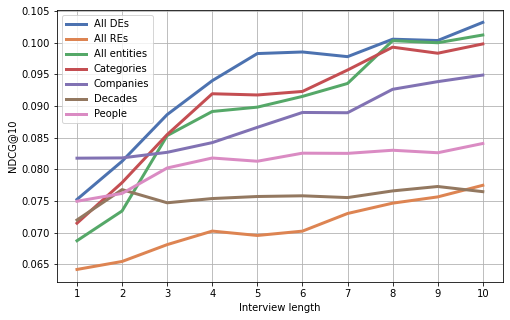

In [8]:
from requests import get
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams['axes.linewidth'] = 0.8
plt.style.use('seaborn-colorblind')
sns.set_palette(sns.color_palette("deep", 10))
print(plt.style.available)
metric = 'ndcg'
cutoff = '10'
n_questions = 10
experiment = 'equal'
xs = np.arange(n_questions) + 1

data = get(f'http://localhost:5000/spectate/results/{experiment}/{metric}/{cutoff}').json()

print(data.keys())

model_values = dict()
name_map = {
    '': 'All DEs',
    '-rec': 'All REs',
    '-category': 'Categories',
    '-decade': 'Decades',
    '-category_company_decade_movie_person': 'All entities',
    '-person': 'People',
    '-company': 'Companies'
}

for model in data:
    alias = name_map.get(model.replace('greedy-adaptive-ppr-joint', ''))

    model_values[alias] = [np.mean(data[model][x - 1]) for x in xs]

fig, ax = plt.subplots(figsize=(8, 5))
width = 0.5

for i, model in enumerate(sorted(model_values)):
    values = model_values.get(model)
    
    plt.plot(xs, model_values.get(model), label=model, linewidth=3, color=f'C{i}')

plt.xticks(xs)
plt.ylabel(f'{metric.upper()}@{cutoff}')
plt.grid()
plt.legend()#loc='upper center', bbox_to_anchor=(0.5, -0.15), shadow=True, ncol=2)
plt.xlabel('Interview length')
plt.savefig('output/type_comparison.pdf', bbox_inches='tight')
plt.show()

print(model_values)
